In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Thesis/

Mounted at /content/drive
/content/drive/MyDrive/Thesis


In [ ]:
import pandas as pd
df = pd.read_excel("Df_Budget.xlsx")
print(df.columns)

Index(['Text', 'Description', 'year _x', 'Running_Time_x', 'Keywords_x',
       'Description_x', 'Rating', 'CreativeType', 'Source', 'Genre',
       'Languages', 'Production_type', 'Running_Time_y', 'Synopsis', 'Revenue',
       'Revenue_int', 'Keywords_y', 'Text3', 'Clean_Lead_Ensemble_Members',
       'Lead_Cast_Members', 'Production_Technical_Credits',
       'Clean_Production_Technical_Credits', 'Clean_Supporting_Cast',
       'Clean_Production_Technical_Credits2', 'merged_column', 'Lead_Actors',
       'Lead_Characters', 'Supporting_Actors', 'Supporting_Characters',
       ' Director', ' Screenwriter', ' Producer', ' Executive Producer',
       ' Director of Photography', ' Production Designer', ' Editor',
       ' Costume Designer', ' Composer', ' Music Supervisor',
       ' Casting Director', ' Stunt Coordinator', ' First Assistant Director',
       ' Visual Effects Supervisor', ' Art Director', ' Set Decorator',
       ' Re-recording Mixer', ' Cinematographer', ' Co-Producer',


In [ ]:
print(df["Running_Time_x"])

0         ['90 minutes']
1         ['98 minutes']
2                     []
3        ['100 minutes']
4                     []
              ...       
15202    ['157 minutes']
15203                 []
15204                 []
15205                 []
15206     ['97 minutes']
Name: Running_Time_x, Length: 15207, dtype: object


In [ ]:
df.drop(['ReleaseDates', 'Text2',
       'Movie2_x', 'Production', 'Movie2_y'], axis=1, inplace=True)

# **Treating NaN**

In [ ]:
import ast

def string_to_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    else:
        return []

# Apply the function to convert the string column to a list column
df['Keywords_x'] = df['Keywords_x'].apply(string_to_list)
df['Running_Time_x'] = df['Running_Time_x'].apply(string_to_list)
df['Lead_Actors'] = df['Lead_Actors'].apply(string_to_list)
df['Supporting_Actors'] = df['Supporting_Actors'].apply(string_to_list)
df['Supporting_Characters'] = df['Supporting_Characters'].apply(string_to_list)
df['Lead_Characters'] = df['Lead_Characters'].apply(string_to_list)

In [ ]:
#Turn Running time into number
def parse_running_time(s):
    if isinstance(s, list) and len(s) > 0:
        running_time_str = s[0]
        if 'minutes' in running_time_str:
            return int(running_time_str.split()[0])
    return None
df['Running_Time_x'] = df['Running_Time_x'].apply(parse_running_time)



In [ ]:
print(df["Running_Time_x"])

0         90.0
1         98.0
2          NaN
3        100.0
4          NaN
         ...  
15202    157.0
15203      NaN
15204      NaN
15205      NaN
15206     97.0
Name: Running_Time_x, Length: 15207, dtype: float64


In [ ]:
#1. Filter only movies that have rating 
import numpy as np
df = df.replace({'budget': 0}, np.nan)

df2 = df[df['budget'].notnull()]


# Remove empty values from the list of actors
df2['Lead_Actors'] = df2['Lead_Actors'].apply(lambda x: list(filter(None, x)))


<ipython-input-9-5e4852d559db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lead_Actors'] = df2['Lead_Actors'].apply(lambda x: list(filter(None, x)))


In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming you already have a DataFrame named 'df2'

# Calculate the number of missing values in each column
missing_values = df2.isnull().sum()

# Create a summary DataFrame
summary_df = pd.DataFrame(missing_values, columns=['Missing Values'])

# Calculate the percentage of missing values
total_rows = df2.shape[0]
summary_df['% Missing'] = ((summary_df['Missing Values'] / total_rows) * 100).round(2).astype(str) + '%'

# Filter columns with zero missing values
summary_df = summary_df[summary_df['Missing Values'] > 0]

# Adjust table dimensions
pd.set_option('display.max_colwidth', None)  # Remove column width limit
pd.set_option('display.expand_frame_repr', False)  # Allow table to expand horizontally

# Generate LaTeX code for the table
latex_table = tabulate(summary_df, headers='keys', tablefmt='latex')

# Save the LaTeX code to a file
with open('summary_table.tex', 'w') as f:
    f.write(latex_table)



In [ ]:
#Fill missing data "Running Time": 
from sklearn.impute import KNNImputer
# create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# impute missing values in the Running_Time_x column
df2[['Running_Time_x']] = imputer.fit_transform(df2[['Running_Time_x']])
print(df2.info())
print(df2["Running_Time_x"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 12 to 15198
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Text                                 2643 non-null   object 
 1   Description                          2643 non-null   object 
 2   year _x                              2643 non-null   int64  
 3   Running_Time_x                       2643 non-null   float64
 4   Keywords_x                           2643 non-null   object 
 5   Description_x                        2643 non-null   object 
 6   Rating                               2138 non-null   object 
 7   CreativeType                         2590 non-null   object 
 8   Source                               2586 non-null   object 
 9   Genre                                2610 non-null   object 
 10  Languages                            1324 non-null   object 
 11  Production_type             

<ipython-input-91-568b1b3a7613>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Running_Time_x']] = imputer.fit_transform(df2[['Running_Time_x']])


In [ ]:
#Fill budget
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
df3 = df2[[ "Genre", "Lead_Actors", "CreativeType", "Revenue_int", " Director","budget"]]

# Fill missing values in 'Director' column with empty string
df3[' Director'] = df3[' Director'].fillna('')

# Split the "Director" column into separate columns
max_directors = max(df3[' Director'].str.count(',') + 1)
director_cols = [f"Director{i+1}" for i in range(max_directors)]
df3[director_cols] = df3[' Director'].str.split(',', expand=True)
df3 = df3.drop(' Director', axis=1)



# Fill missing values in 'Lead_Actors' column with empty string
# Replace empty lists with NaN values
df3['Lead_Actors'] = df3['Lead_Actors'].apply(lambda x: np.nan if len(x)==0 else x)

# Fill missing values in 'Lead_Actors' column with empty string
df3['Lead_Actors'] = df3['Lead_Actors'].fillna('')


# Split the "Lead_Actors" column into separate columns
max_lead_actors = int((df3['Lead_Actors'].str.count(',') + 1).max())
lead_actor_cols = [f"Lead_Actor{i+1}" for i in range(max_lead_actors)]
df3[lead_actor_cols] = df3['Lead_Actors'].str.split(',', expand=True)
df3 = df3.drop('Lead_Actors', axis=1)



# Encode the categorical columns
df3_encoded = pd.get_dummies(df3, columns=["Genre", "CreativeType"] + director_cols + lead_actor_cols)

# Create an iterative imputer object
imputer = IterativeImputer()

# Impute the missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df3_encoded.drop("budget", axis=1)), columns=df3_encoded.drop("budget", axis=1).columns)

# Combine the imputed values with the budget column
df_final = pd.concat([df_imputed, df3_encoded["budget"]], axis=1)

# View the imputed dataset
print(df_final.head())




In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
# split the DataFrame into 4 equal parts
df_splits = np.array_split(df2, 4)

# assign the splits to new DataFrame variables
df3, df4, df5, df6 = df_splits

# example: print the size of each split
for i, split in enumerate(df_splits):
    print(f"Size of split {i+1}: {len(split)}")

Size of split 1: 897
Size of split 2: 896
Size of split 3: 896
Size of split 4: 896


In [ ]:
for desc in df2["Synopsis"].head():
  print(type(desc))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
#Get the sentiment score for the feature to determine the strength of the plot. 
from transformers import pipeline

# load pre-trained pipeline for text classification
classifier = pipeline("text-classification", model="textattack/bert-base-uncased-imdb")

# create a list to store the predicted scores
scores = []

# iterate over the movie descriptions in the DataFrame
for desc in df2["Synopsis"]:
  desc = str(desc)
    # use the transformer pipeline to predict the sentiment score of the description
  result = classifier(desc, truncation=True, max_length=512)[0]
    # extract the predicted score from the result dictionary
  score = result["score"]
    # add the score to the list of scores
  scores.append(score)

# create a new column with the predicted scores
df2["Sentiment_Score_imdb"] = scores


<ipython-input-23-d8b23f017b97>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sentiment_Score_imdb"] = scores


In [ ]:
df2.to_excel("Movies_Sentiment(Budget).xlsx", index=False)

# **Calculating starpower**

In [ ]:
#open Sentiment: 
import pandas as pd
df = pd.read_excel("Movies_Sentiment(Budget).xlsx")
df2 = pd.read_excel("Starpower.xlsx")
import ast

def string_to_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    else:
        return []

# Apply the function to convert the string column to a list column
df['Keywords_x'] = df['Keywords_x'].apply(string_to_list)
df['Running_Time_x'] = df['Running_Time_x'].apply(string_to_list)
df['Lead_Actors'] = df['Lead_Actors'].apply(string_to_list)
df['Supporting_Actors'] = df['Supporting_Actors'].apply(string_to_list)
df['Supporting_Characters'] = df['Supporting_Characters'].apply(string_to_list)
df['Lead_Characters'] = df['Lead_Characters'].apply(string_to_list)

In [ ]:
print(df.head())

                         Text  \
0              The 355 (2022)   
1               Scream (2022)   
2  The King’s Daughter (2022)   
3             Moonfall (2022)   
4    Death on the Nile (2022)   

                                         Description  year _x Running_Time_x  \
0  SynopsisWhenatop-secretweaponfallsintomercenar...     2022             []   
1  SynopsisTwenty-fiveyearsafterastreakofbrutalmu...     2022             []   
2  SynopsisKingLouisXIV’squestforimmortalityleads...     2022             []   
3  SynopsisAmysteriousforceknockstheMoonfromitsor...     2022             []   
4  SynopsisBelgiansleuthHerculePoirot’sEgyptianva...     2022             []   

                                          Keywords_x  \
0         [MI6, C.I.A., SecretAgent, ActionThriller]   
1  [SlasherHorror, DelayedSequel, ThePastCatching...   
2  [Royalty, Mermaids, DysfunctionalFamily, Roman...   
3          [ActionThriller, EndoftheWorld, Disaster]   
4                      [MurderMystery, M

In [ ]:
df = df.rename(columns={"Text": "Title"})

In [ ]:
#Create new column with only the actors, supporting actors, year, and movie tittle: 
# create new DataFrame with only "actor" and "supporting_actor" columns
new_df = df[['Lead_Actors', 'Supporting_Actors',"Title","year _x"]]
print(new_df.head())
print(df2.head())

                                         Lead_Actors  \
0  [Jessica Chastain, Penélope Cruz, Fan Bingbing...   
1     [Neve Campbell, Courteney Cox, David Arquette]   
2                  [Pierce Brosnan, Kaya Scodelario]   
3        [Halle Berry, Patrick Wilson, John Bradley]   
4                                                 []   

                                   Supporting_Actors  \
0  [Edgar Ramirez, Sebastian Stan, Leo Staar, Jas...   
1  [Jack Quaid, Kyle Gallner, Jenna Ortega, Marle...   
2  [William Hurt, Benjamin Walker, Fan Bingbing, ...   
3  [Michael Peña, Charlie Plummer, Kelly Yu, Eme ...   
4                                                 []   

                        Title  year _x  
0              The 355 (2022)     2022  
1               Scream (2022)     2022  
2  The King’s Daughter (2022)     2022  
3             Moonfall (2022)     2022  
4    Death on the Nile (2022)     2022  
               Name  Star_Score  Movies  Average_Billing   Year 
0     Margot Ro

In [ ]:
#Mix actors: 

# create new column with combined list of actors
new_df['All_Actors'] = new_df.apply(lambda row: row['Lead_Actors'] + row['Supporting_Actors'], axis=1)

for i, row in new_df.iterrows():
    new_actors = []
    for actor in row['All_Actors']:
        new_actor = actor + str(row['year _x'])
        new_actors.append(new_actor)
    new_df.at[i, 'All_Actors'] = new_actors


print(new_df.head())
print(df2.head())

<ipython-input-31-dde56f53d9b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['All_Actors'] = new_df.apply(lambda row: row['Lead_Actors'] + row['Supporting_Actors'], axis=1)


                                         Lead_Actors  \
0  [Jessica Chastain, Penélope Cruz, Fan Bingbing...   
1     [Neve Campbell, Courteney Cox, David Arquette]   
2                  [Pierce Brosnan, Kaya Scodelario]   
3        [Halle Berry, Patrick Wilson, John Bradley]   
4                                                 []   

                                   Supporting_Actors  \
0  [Edgar Ramirez, Sebastian Stan, Leo Staar, Jas...   
1  [Jack Quaid, Kyle Gallner, Jenna Ortega, Marle...   
2  [William Hurt, Benjamin Walker, Fan Bingbing, ...   
3  [Michael Peña, Charlie Plummer, Kelly Yu, Eme ...   
4                                                 []   

                        Title  year _x  \
0              The 355 (2022)     2022   
1               Scream (2022)     2022   
2  The King’s Daughter (2022)     2022   
3             Moonfall (2022)     2022   
4    Death on the Nile (2022)     2022   

                                          All_Actors  
0  [Jessica Chasta

In [ ]:
df2['Name2'] = df2['Name'] + df2[' Year '].astype(str)
print(df2.head())
print(new_df)

               Name  Star_Score  Movies  Average_Billing   Year   \
0     Margot Robbie         210       4              1.5    2022   
1  Robert Pattinson         190       2              1.5    2022   
2       Tom Holland         187       2              1.0    2022   
3        Jim Carrey         184       2              3.0    2022   
4       Salma Hayek         180       3              3.3    2022   

                  Name2  
0     Margot Robbie2022  
1  Robert Pattinson2022  
2       Tom Holland2022  
3        Jim Carrey2022  
4       Salma Hayek2022  
                                            Lead_Actors  \
0     [Jessica Chastain, Penélope Cruz, Fan Bingbing...   
1        [Neve Campbell, Courteney Cox, David Arquette]   
2                     [Pierce Brosnan, Kaya Scodelario]   
3           [Halle Berry, Patrick Wilson, John Bradley]   
4                                                    []   
...                                                 ...   
2638                  

In [ ]:
new_df[['starpower', 'movies', 'Average_Billing']] = new_df.apply(lambda row: pd.Series({
    'starpower': sum([df2.loc[df2['Name2'] == actor, 'Star_Score'].values[0] for actor in row['All_Actors'] if df2['Name2'].isin([actor]).any()]),
    'movies': sum([df2.loc[df2['Name2'] == actor, 'Movies'].values[0] for actor in row['All_Actors'] if df2['Name2'].isin([actor]).any()]),
    'Average_Billing': sum([df2.loc[df2['Name2'] == actor, 'Average_Billing'].values[0] for actor in row['All_Actors'] if df2['Name2'].isin([actor]).any()]) / len(row['All_Actors']) if len(row['All_Actors']) > 0 else 0

}), axis=1)




<ipython-input-33-2d5f1c42ac72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['starpower', 'movies', 'Average_Billing']] = new_df.apply(lambda row: pd.Series({
<ipython-input-33-2d5f1c42ac72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['starpower', 'movies', 'Average_Billing']] = new_df.apply(lambda row: pd.Series({
<ipython-input-33-2d5f1c42ac72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
print(new_df.columns)

Index(['Lead_Actors', 'Supporting_Actors', 'Title', 'year _x', 'All_Actors',
       'starpower', 'movies', 'Average_Billing'],
      dtype='object')


In [ ]:
print(new_df.head())

                                         Lead_Actors  \
0  [Jessica Chastain, Penélope Cruz, Fan Bingbing...   
1     [Neve Campbell, Courteney Cox, David Arquette]   
2                  [Pierce Brosnan, Kaya Scodelario]   
3        [Halle Berry, Patrick Wilson, John Bradley]   
4                                                 []   

                                   Supporting_Actors  \
0  [Edgar Ramirez, Sebastian Stan, Leo Staar, Jas...   
1  [Jack Quaid, Kyle Gallner, Jenna Ortega, Marle...   
2  [William Hurt, Benjamin Walker, Fan Bingbing, ...   
3  [Michael Peña, Charlie Plummer, Kelly Yu, Eme ...   
4                                                 []   

                        Title  year _x  \
0              The 355 (2022)     2022   
1               Scream (2022)     2022   
2  The King’s Daughter (2022)     2022   
3             Moonfall (2022)     2022   
4    Death on the Nile (2022)     2022   

                                          All_Actors  starpower  movies  

In [ ]:
merged_df = pd.merge(df,new_df, on="Title")

In [ ]:

merged_df = merged_df.drop(['Lead_Actors_y', 'Supporting_Actors_y',
       'year _x_y'], axis=1)

print(merged_df.columns)

Index(['Title', 'Description', 'year _x_x', 'Running_Time_x', 'Keywords_x',
       'Description_x', 'Rating', 'CreativeType', 'Source', 'Genre',
       'Languages', 'Production_type', 'Running_Time_y', 'Synopsis', 'Revenue',
       'Revenue_int', 'Keywords_y', 'Text3', 'Clean_Lead_Ensemble_Members',
       'Lead_Cast_Members', 'Production_Technical_Credits',
       'Clean_Production_Technical_Credits', 'Clean_Supporting_Cast',
       'Clean_Production_Technical_Credits2', 'merged_column', 'Lead_Actors_x',
       'Lead_Characters', 'Supporting_Actors_x', 'Supporting_Characters',
       ' Director', ' Screenwriter', ' Producer', ' Executive Producer',
       ' Director of Photography', ' Production Designer', ' Editor',
       ' Costume Designer', ' Composer', ' Music Supervisor',
       ' Casting Director', ' Stunt Coordinator', ' First Assistant Director',
       ' Visual Effects Supervisor', ' Art Director', ' Set Decorator',
       ' Re-recording Mixer', ' Cinematographer', ' Co-Prod

In [ ]:
# save df3 to an Excel file
merged_df.to_excel("Movies_Starpower(Budget).xlsx", index=False)

In [ ]:
print(merged_df.columns)

Index(['Title', 'Description', 'year _x_x', 'Running_Time_x', 'Keywords_x',
       'Description_x', 'Rating', 'CreativeType', 'Source', 'Genre',
       'Languages', 'Production_type', 'Running_Time_y', 'Synopsis', 'Revenue',
       'Revenue_int', 'Keywords_y', 'Text3', 'Clean_Lead_Ensemble_Members',
       'Lead_Cast_Members', 'Production_Technical_Credits',
       'Clean_Production_Technical_Credits', 'Clean_Supporting_Cast',
       'Clean_Production_Technical_Credits2', 'merged_column', 'Lead_Actors_x',
       'Lead_Characters', 'Supporting_Actors_x', 'Supporting_Characters',
       ' Director', ' Screenwriter', ' Producer', ' Executive Producer',
       ' Director of Photography', ' Production Designer', ' Editor',
       ' Costume Designer', ' Composer', ' Music Supervisor',
       ' Casting Director', ' Stunt Coordinator', ' First Assistant Director',
       ' Visual Effects Supervisor', ' Art Director', ' Set Decorator',
       ' Re-recording Mixer', ' Cinematographer', ' Co-Prod

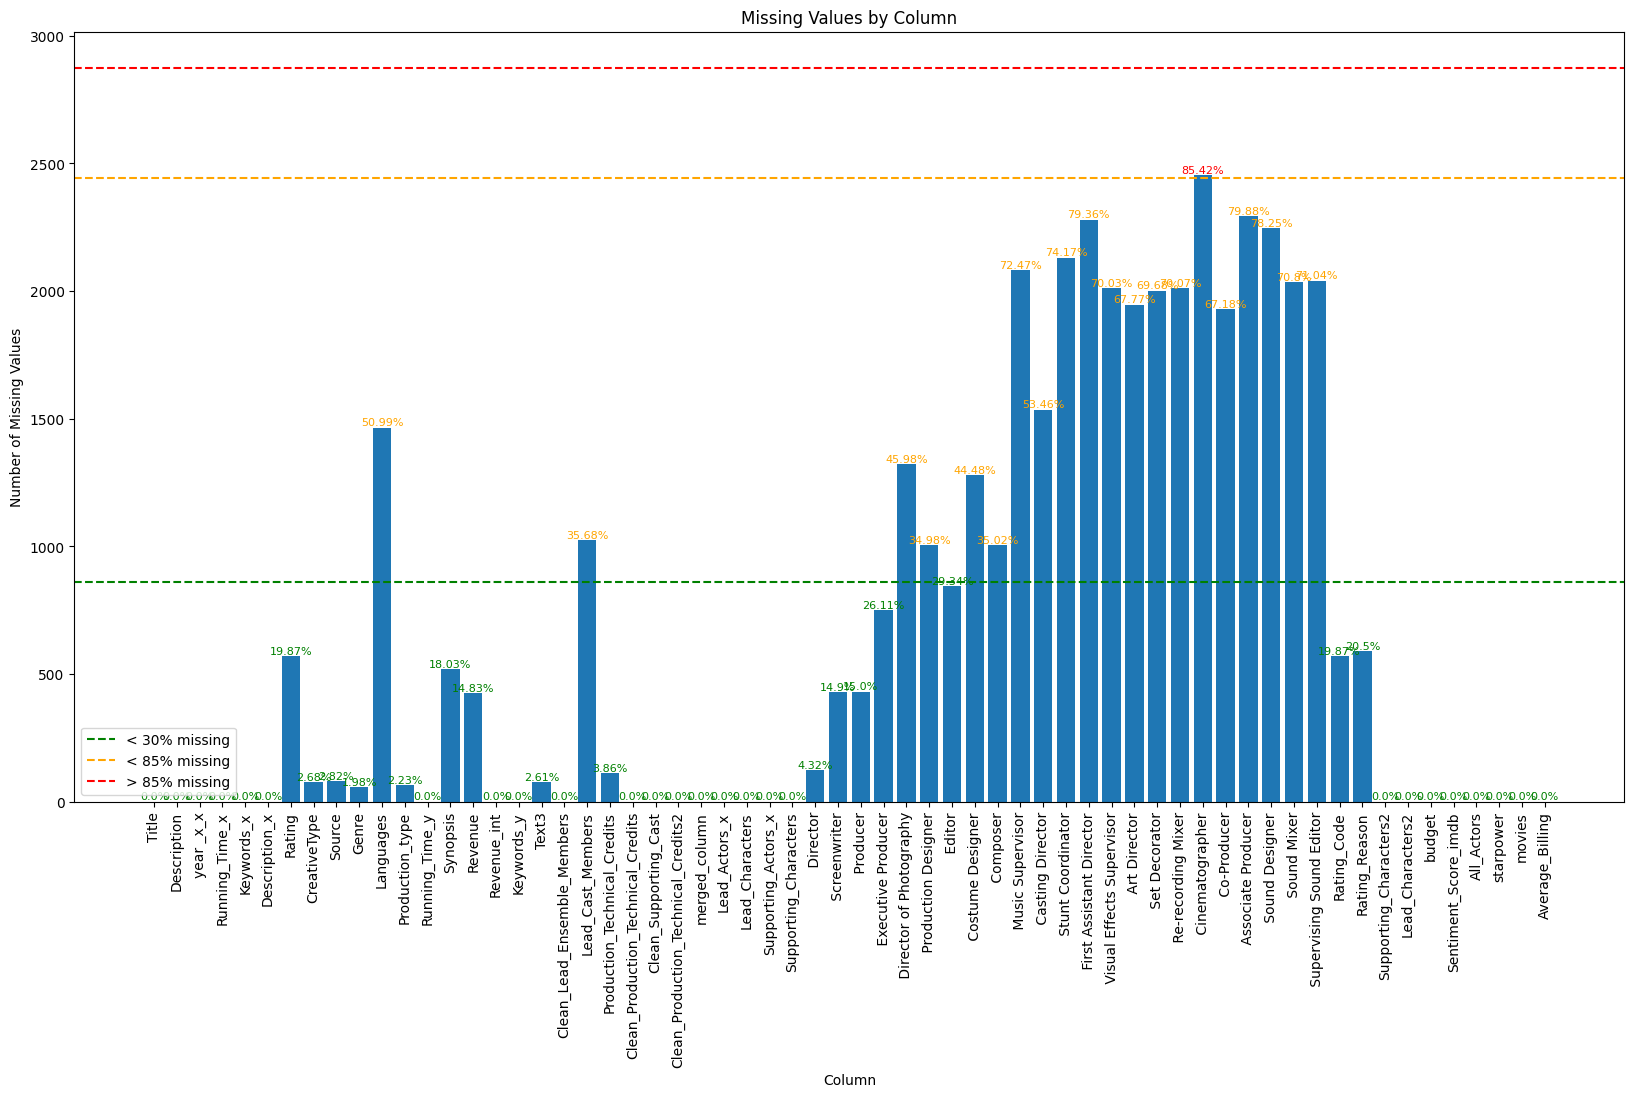

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Count the number of missing values for each column
missing_values = merged_df.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = round((missing_values / len(merged_df)) * 100, 2)

# Set thresholds for differentiating between low, medium, and high missing values
low_threshold = 30
high_threshold = 85

# Create a bar plot to visualize the results
plt.figure(figsize=(20, 10))  # Set the figure size
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')

# Add percentage of missing values as text, and differentiate between low, medium, and high missing values
for i, v in enumerate(percent_missing):
    if v < low_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='green')
    elif v < high_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='orange')
    else:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='red')

# Add horizontal lines to identify the different thresholds
plt.axhline(y=low_threshold*len(merged_df)/100, color='green', linestyle='--', label=f'< {low_threshold}% missing')
plt.axhline(y=high_threshold*len(merged_df)/100, color='orange', linestyle='--', label=f'< {high_threshold}% missing')
plt.axhline(y=len(merged_df), color='red', linestyle='--', label=f'> {high_threshold}% missing')
plt.legend()

plt.show()


# ***Calculating Tectnical Cast Power***

In [ ]:
import pandas as pd
df = pd.read_excel("Movies_Starpower(Budget).xlsx")
Composer = pd.read_excel("Comp_List.xlsx")
Director = pd.read_excel("Directos names.xlsx")
Editors = pd.read_excel("Editors_List.xlsx")
Executive = pd.read_excel("Executive_List.xlsx")
Producer = pd.read_excel("Producer_List.xlsx")
Screenwriter = pd.read_excel("Screenwriter_list.xlsx")
import ast

def string_to_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    else:
        return []

# Apply the function to convert the string column to a list column
df['Keywords_x'] = df['Keywords_x'].apply(string_to_list)
df['Running_Time_x'] = df['Running_Time_x'].apply(string_to_list)
df[' Producer'] = df[' Producer'].apply(string_to_list)
df[" Screenwriter"] = df[" Screenwriter"].apply(string_to_list)
df[" Director"] = df[" Director"].apply(string_to_list)
df[" Executive Producer"] = df[" Executive Producer"].apply(string_to_list)
df[" Composer"] = df[" Composer"].apply(string_to_list)
df[" Editor"] = df[" Editor"].apply(string_to_list)


In [ ]:
#Fix columns
new_header = Composer.iloc[0]
Composer = Composer[1:]
Composer.columns = new_header
print(Composer.head())

new_header = Director.iloc[0]
Director = Director[1:]
Director.columns = new_header
print(Director.head())

new_header = Editors.iloc[0]
Editors = Editors[1:]
Editors.columns = new_header
print(Editors.head())

new_header = Executive.iloc[0]
Executive = Executive[1:]
Executive.columns = new_header
print(Executive.head())

new_header = Producer.iloc[0]
Producer = Producer[1:]
Producer.columns = new_header
print(Producer.head())

new_header = Screenwriter.iloc[0]
Screenwriter = Screenwriter[1:]
Screenwriter.columns = new_header
print(Screenwriter.head())

0  NaN Rank             Composer    Worldwide Movies    Average
1  NaN    1          Hans Zimmer  31905858976    107  298185598
2  NaN    2        John Williams  25515406559     79  322979830
3  NaN    3    Michael Giacchino  21868238261     45  485960850
4  NaN    4  James Newton Howard  19335875263    123  157202238
5  NaN    5       Alan Silvestri  18856246232     91  207211497
0  NaN Rank          Director    Worldwide Movies    Average
1  NaN    1  Steven Spielberg  10682596733     36  296738798
2  NaN    2     James Cameron   8702981668     14  621641548
3  NaN    3         Joe Russo   6840246172      9  760027352
4  NaN    4     Anthony Russo   6840246172      8  855030772
5  NaN    5     Peter Jackson   6537879808     15  435858654
0  NaN Rank         Editors    Worldwide Movies    Average
1  NaN    1    Jeffrey Ford  13567717504     14  969122679
2  NaN    2    Michael Kahn  11964709617     53  225749238
3  NaN    3  Stephen Rivkin   9060848815     16  566303051
4  NaN    4   

In [ ]:

print(Composer.columns)
Composer['Average'] = Composer['Average'].astype(int)
Composer['Movies'] = Composer['Movies'].astype(int)
Producer['Average'] = Producer['Average'].astype(int)
Producer['Movies'] = Producer['Movies'].astype(int)
Editors['Average'] = Editors['Average'].astype(int)
Editors['Movies'] = Editors['Movies'].astype(int)
Executive['Average'] =Executive['Average'].astype(int)
Executive['Movies'] =Executive['Movies'].astype(int)
Screenwriter['Average'] = Screenwriter['Average'].astype(int)
Screenwriter['Movies'] = Screenwriter['Movies'].astype(int)
Director['Average'] = Director['Average'].astype(int)
Director['Movies'] = Director['Movies'].astype(int)



Index([nan, 'Rank', 'Composer', 'Worldwide', 'Movies', 'Average'], dtype='object', name=0)


In [ ]:
new_df = df[[" Producer"," Screenwriter", " Director", " Executive Producer", " Editor", " Composer","Title"]]




In [ ]:
import numpy as np
import pandas as pd

# define the function to add credits information
def add_credits_info(df, column_name, credit_df, credit_column_name):
    # create a dictionary with credit names as keys and corresponding average and number of movies as values
    credit_dict = {}
    for index, row in credit_df.iterrows():
        credit_name = row[credit_column_name].strip()
        if credit_name:
            credit_avg = row['Average']
            credit_num_movies = row['Movies']
            credit_dict[credit_name] = (credit_avg, credit_num_movies)

    # create empty lists to hold the values for the new columns
    movies_credit_list = []
    avg_credit_list = []
    num_credit_list = []

    # iterate over the rows of the dataframe
    for index, row in df.iterrows():
        credit_list = row[column_name]
        credit_avg_list = []
        credit_movie_list = []
        for credit_name in credit_list:
            # remove the leading/trailing white spaces from the credit name
            credit_name = credit_name.strip()
            if credit_name in credit_dict:
                credit_avg_list.append(credit_dict[credit_name][0])
                credit_movie_list.append(credit_dict[credit_name][1])

        # append the number of movies for each credit, their average, and the total number of credits
        num_credits = len(credit_list)

        if num_credits == 0:
            movies_credit_list.append(np.nan)
            avg_credit_list.append(np.nan)
            num_credit_list.append(0)
        else:
            movies_credit_list.append(sum(credit_movie_list))
            avg_credit_list.append(sum(credit_avg_list))
            num_credit_list.append(num_credits)

    # add the new columns to the dataframe
    df[f'Movies_{credit_column_name}'] = movies_credit_list
    df[f'Avg_{credit_column_name}'] = avg_credit_list
    df[f'Num_{credit_column_name}'] = num_credit_list
    
# apply the function to add credits information to the new_df dataframe
add_credits_info(new_df, ' Composer', Composer, 'Composer')
add_credits_info(new_df, ' Director', Director, 'Director')
add_credits_info(new_df, ' Editor', Editors, 'Editors')
add_credits_info(new_df, ' Executive Producer', Executive, 'Executive')
add_credits_info(new_df, ' Producer', Producer, 'Producer')
add_credits_info(new_df, ' Screenwriter', Screenwriter, 'Screenwriter')



<ipython-input-45-c0f618844b77>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Movies_{credit_column_name}'] = movies_credit_list
<ipython-input-45-c0f618844b77>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Avg_{credit_column_name}'] = avg_credit_list
<ipython-input-45-c0f618844b77>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
# Calculate the Movies per Personel and add a new column
new_df['Movies_Producer_Per_Producer'] = new_df['Movies_Producer'] / new_df['Num_Producer']
new_df['Movies_Screenwriter_Per_Screenwriter'] = new_df['Movies_Screenwriter'] / new_df['Num_Screenwriter']
new_df['Movies_Director_Per_Director'] = new_df['Movies_Director'] / new_df['Num_Director']
new_df['Movies_Composer_Per_Composer'] = new_df['Movies_Composer'] / new_df['Num_Composer']
new_df['Movies_Editors_Per_Editor'] = new_df['Movies_Editors'] / new_df['Num_Editors']
new_df['Movies_Executive_Per_Executive'] = new_df['Movies_Executive'] / new_df['Num_Executive']

# Calculate the Average per Personel and add a new column
new_df['Avg_Producer_Per_Producer'] = new_df['Avg_Producer'] / new_df['Num_Producer']
new_df['Avg_Screenwriter_Per_Screenwriter'] = new_df['Avg_Screenwriter'] / new_df['Num_Screenwriter']
new_df['Avg_Director_Per_Director'] = new_df['Avg_Director'] / new_df['Num_Director']
new_df['Avg_Composer_Per_Composer'] = new_df['Avg_Composer'] / new_df['Num_Composer']
new_df['Avg_Editors_Per_Editor'] = new_df['Avg_Editors'] / new_df['Num_Editors']
new_df['Avg_Executive_Per_Executive'] = new_df['Avg_Executive'] / new_df['Num_Executive']


<ipython-input-46-8fdae4a908a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Movies_Producer_Per_Producer'] = new_df['Movies_Producer'] / new_df['Num_Producer']
<ipython-input-46-8fdae4a908a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Movies_Screenwriter_Per_Screenwriter'] = new_df['Movies_Screenwriter'] / new_df['Num_Screenwriter']
<ipython-input-46-8fdae4a908a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [ ]:
print(new_df.info())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0    Producer                             2873 non-null   object 
 1    Screenwriter                         2873 non-null   object 
 2    Director                             2873 non-null   object 
 3    Executive Producer                   2873 non-null   object 
 4    Editor                               2873 non-null   object 
 5    Composer                             2873 non-null   object 
 6   Title                                 2873 non-null   object 
 7   Movies_Composer                       1867 non-null   float64
 8   Avg_Composer                          1867 non-null   float64
 9   Num_Composer                          2873 non-null   int64  
 10  Movies_Director                       2749 non-null   float64
 11  Avg_Director     

In [ ]:
merged_df = pd.merge(df,new_df, on="Title")
merged_df = merged_df.drop_duplicates(subset=["Title"])


In [ ]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 13156
Data columns (total 98 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 2597 non-null   object 
 1   Description                           2597 non-null   object 
 2   year _x_x                             2597 non-null   int64  
 3   Running_Time_x                        2597 non-null   object 
 4   Keywords_x                            2597 non-null   object 
 5   Description_x                         2597 non-null   object 
 6   Rating                                2105 non-null   object 
 7   CreativeType                          2550 non-null   object 
 8   Source                                2546 non-null   object 
 9   Genre                                 2570 non-null   object 
 10  Languages                             1309 non-null   object 
 11  Production_type 

In [ ]:
merged_df.to_excel("Movies_Tecnical(Budget).xlsx", index=False)

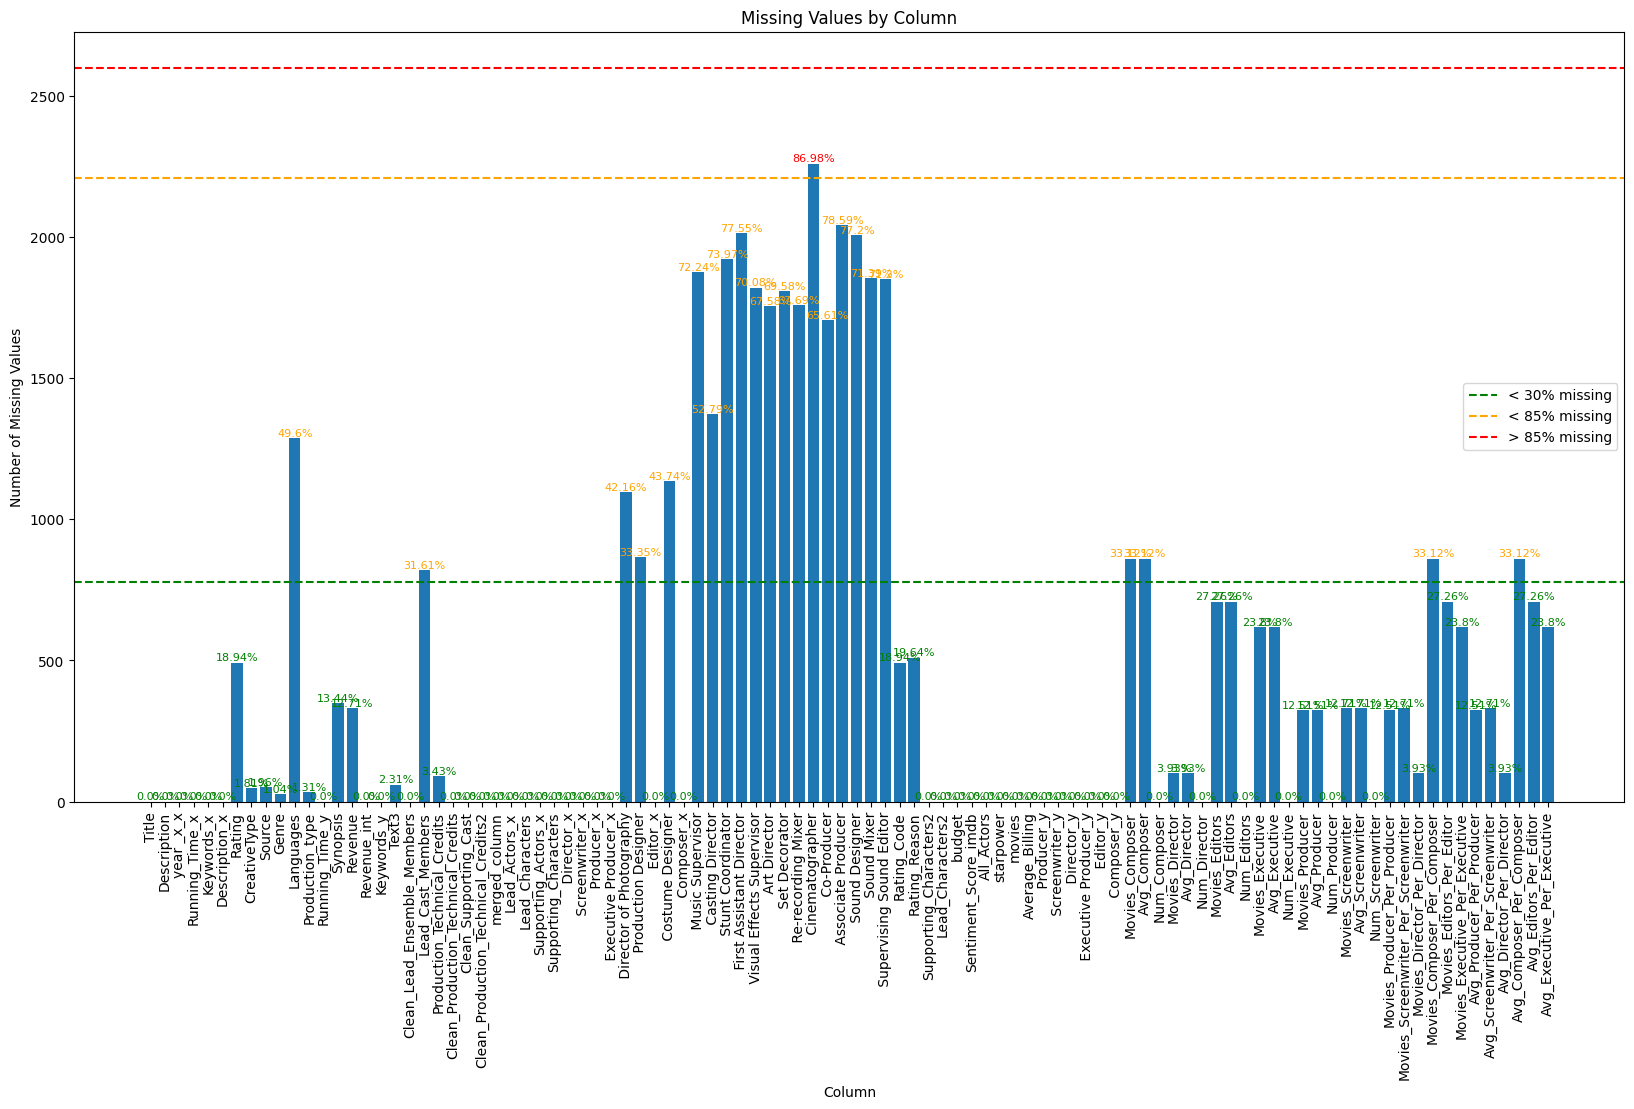

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Count the number of missing values for each column
missing_values = merged_df.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = round((missing_values / len(merged_df)) * 100, 2)

# Set thresholds for differentiating between low, medium, and high missing values
low_threshold = 30
high_threshold = 85

# Create a bar plot to visualize the results
plt.figure(figsize=(20, 10))  # Set the figure size
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')

# Add percentage of missing values as text, and differentiate between low, medium, and high missing values
for i, v in enumerate(percent_missing):
    if v < low_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='green')
    elif v < high_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='orange')
    else:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='red')

# Add horizontal lines to identify the different thresholds
plt.axhline(y=low_threshold*len(merged_df)/100, color='green', linestyle='--', label=f'< {low_threshold}% missing')
plt.axhline(y=high_threshold*len(merged_df)/100, color='orange', linestyle='--', label=f'< {high_threshold}% missing')
plt.axhline(y=len(merged_df), color='red', linestyle='--', label=f'> {high_threshold}% missing')
plt.legend()

plt.show()


# **Word Embedings**

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import ast

def string_to_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    else:
        return []
        
# Load your dataset
df =  pd.read_excel("Movies_Tecnical(Budget).xlsx")
df['Keywords_x'] = df['Keywords_x'].apply(string_to_list)




In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 98 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 2597 non-null   object 
 1   Description                           2597 non-null   object 
 2   year _x_x                             2597 non-null   int64  
 3   Running_Time_x                        2597 non-null   object 
 4   Keywords_x                            2597 non-null   object 
 5   Description_x                         2597 non-null   object 
 6   Rating                                2105 non-null   object 
 7   CreativeType                          2550 non-null   object 
 8   Source                                2546 non-null   object 
 9   Genre                                 2570 non-null   object 
 10  Languages                             1309 non-null   object 
 11  Production_type  

In [ ]:
df2 = df[["Title","year _x_x","Keywords_x", 'Revenue_int']]
print(df2.head())

                        Title  year _x_x  \
0              The 355 (2022)       2022   
1               Scream (2022)       2022   
2  The King’s Daughter (2022)       2022   
3             Moonfall (2022)       2022   
4    Death on the Nile (2022)       2022   

                                          Keywords_x  Revenue_int  
0         [MI6, C.I.A., SecretAgent, ActionThriller]     18902798  
1  [SlasherHorror, DelayedSequel, ThePastCatching...    138874789  
2  [Royalty, Mermaids, DysfunctionalFamily, Roman...      2157750  
3          [ActionThriller, EndoftheWorld, Disaster]     59053195  
4                      [MurderMystery, MysteryDrama]    130298184  


In [ ]:
from gensim.models import Word2Vec
import pandas as pd

# Extract the keywords column as a list of lists of words
keywords = [str(kwds).split(", ") for kwds in df2["Keywords_x"]]

# Train the Word2Vec model on the list of keywords
model = Word2Vec(keywords, min_count=1, vector_size=100)

# Get the word embeddings for each keyword
embeddings = []
for kwds in keywords:
    kwd_embeddings = []
    for kwd in kwds:
        if kwd in model.wv.key_to_index:
            kwd_embeddings.append(model.wv[kwd])
    if kwd_embeddings:
        embeddings.append(sum(kwd_embeddings) / len(kwd_embeddings))
    else:
        embeddings.append([0] * model.vector_size)

# Add the embeddings as new columns in the dataframe
for i in range(model.vector_size):
    df2[f"embedding_{i}"] = [embedding[i] for embedding in embeddings]


<ipython-input-55-a6761fcc0bda>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"embedding_{i}"] = [embedding[i] for embedding in embeddings]
<ipython-input-55-a6761fcc0bda>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f"embedding_{i}"] = [embedding[i] for embedding in embeddings]
<ipython-input-55-a6761fcc0bda>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
print(df2.columns)

Index(['Title', 'year _x_x', 'Keywords_x', 'Revenue_int', 'embedding_0',
       'embedding_1', 'embedding_2', 'embedding_3', 'embedding_4',
       'embedding_5',
       ...
       'embedding_90', 'embedding_91', 'embedding_92', 'embedding_93',
       'embedding_94', 'embedding_95', 'embedding_96', 'embedding_97',
       'embedding_98', 'embedding_99'],
      dtype='object', length=104)


In [ ]:
df2['combined_embedding'] = df2.iloc[:, 4:].values.tolist()
print(df2)

                                              Title  year _x_x  \
0                                    The 355 (2022)       2022   
1                                     Scream (2022)       2022   
2                        The King’s Daughter (2022)       2022   
3                                   Moonfall (2022)       2022   
4                          Death on the Nile (2022)       2022   
...                                             ...        ...   
2592                               Camping 2 (2010)       2010   
2593                                   Fatal (2010)       2010   
2594                     Konferenz der Tiere (2010)       2010   
2595                                The Reef (2010)       2010   
2596  Sammy's avonturen: De geheime doorgang (2010)       2010   

                                             Keywords_x  Revenue_int  \
0            [MI6, C.I.A., SecretAgent, ActionThriller]     18902798   
1     [SlasherHorror, DelayedSequel, ThePastCatching...    1388

<ipython-input-57-073f3f9fedb3>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2['combined_embedding'] = df2.iloc[:, 4:].values.tolist()


In [ ]:
import pandas as pd
word_embeddings = {}
for index, row in df2.iterrows():
    # loop through each keyword in the list of keywords for the row
    for keyword in row['Keywords_x']:
        # check if the keyword is already in the dictionary
        if keyword in word_embeddings:
            # if it is, increment the count for the keyword
            word_embeddings[keyword] += 1
        else:
            # if it's not, add it to the dictionary with a count of 1
            word_embeddings[keyword] = 1

print(word_embeddings)


{'MI6': 2, 'C.I.A.': 29, 'SecretAgent': 67, 'ActionThriller': 106, 'SlasherHorror': 29, 'DelayedSequel': 83, 'ThePastCatchingupwithYou': 15, 'Royalty': 39, 'Mermaids': 7, 'DysfunctionalFamily': 388, 'Romance': 438, 'Supernatural': 114, 'EndoftheWorld': 35, 'Disaster': 40, 'MurderMystery': 15, 'MysteryDrama': 7, 'FBI': 28, 'Undercover': 50, 'ConspiracyTheory': 27, 'CorruptCops': 77, 'TreasureHunters': 15, 'ChaseAdventure': 4, 'RoadTrip': 70, 'AnimalLead': 135, 'ReturningSoldiers': 26, 'FuneralReunions': 12, 'DeathofaBestFriend': 8, 'DirectingYourself': 101, 'ActorsMakingTheirDirectorialDebut': 17, 'ScreenplayWrittenBytheStar': 75, 'BuddyComedy': 33, 'Reboot': 30, 'Crime': 20, 'SerialKiller': 40, 'MoneyTroubles': 40, 'FamilyAdventure': 20, 'HumanAnimalTransformation': 5, 'Curses': 21, 'Heist': 77, 'TalkingAnimals': 87, 'CrimeCaper': 9, 'FamilyComedy': 19, 'PornBusiness': 7, 'MovieBusiness': 28, '1970s': 38, 'FilmedinNewZealand': 2, 'WritingandWriters': 60, 'ActionAdventure': 59, 'Alterna

In [ ]:
import pandas as pd

# assuming your data is stored in a pandas DataFrame called `df`
columns_to_keep = ['Title', 'combined_embedding']
df2 = df2[columns_to_keep]


In [ ]:
merged_df = pd.merge(df,df2, on="Title")
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2596
Data columns (total 99 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 2597 non-null   object 
 1   Description                           2597 non-null   object 
 2   year _x_x                             2597 non-null   int64  
 3   Running_Time_x                        2597 non-null   object 
 4   Keywords_x                            2597 non-null   object 
 5   Description_x                         2597 non-null   object 
 6   Rating                                2105 non-null   object 
 7   CreativeType                          2550 non-null   object 
 8   Source                                2546 non-null   object 
 9   Genre                                 2570 non-null   object 
 10  Languages                             1309 non-null   object 
 11  Production_type  

In [ ]:
# Save the updated dataframe
merged_df.to_csv("Df_wordemb(Budget).csv", index=False)

# **Adding Economical Input**

In [ ]:
import pandas as pd
df = pd.read_csv("Df_wordemb(Budget).csv")
df = df.loc[:, df.notnull().sum(axis=0) >= 2000]
price = pd.read_excel("Price per ticket.xlsx")
dates = pd.read_excel("Dates_Movies.xlsx")
CCI = pd.read_excel("CCI-G20.xlsx")


In [ ]:
import pandas as pd

# dictionary to map full month names to abbreviated form
month_dict = {'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
              'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
              'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'}

# replace full month names with their abbreviated form
dates["Full - Date"] = dates["Full - Date"].replace(month_dict, regex=True)

# convert Full - Date column to datetime format
dates["Full - Date"] = pd.to_datetime(dates["Full - Date"], format="%b %d-%Y")

# extract month and year and create new columns
dates["Month"] = dates["Full - Date"].dt.strftime("%Y-%m")
dates["TIME"] = dates["Full - Date"].dt.strftime("%Y-%b")



In [ ]:
import datetime
dates['TIME'] = dates['TIME'].str.replace(r'(\d{4})-(\w{3})', lambda x: x.group(1) + '-' + str(datetime.datetime.strptime(x.group(2), "%b").month).zfill(2))


<ipython-input-4-0c64af76c6ff>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dates['TIME'] = dates['TIME'].str.replace(r'(\d{4})-(\w{3})', lambda x: x.group(1) + '-' + str(datetime.datetime.strptime(x.group(2), "%b").month).zfill(2))


In [ ]:
print(dates.head())
print(CCI.head())

     Release                                   Movie            Genre  \
0  January 1                              Belli ciao           Comedy   
1  January 1          Chief Daddy 2: Going for Broke           Comedy   
2  January 1  Harry Potter 20th Anniversary: Return…      Documentary   
3  January 1             Kesisme: Iyi Ki Varsin Eren           Action   
4  January 1              Lasciarsi un giorno a Roma  Romantic Comedy   

    Release.1  Revenue  Year      Date2 Full - Date    Month     TIME  
0  Theatrical  3591960  2022  January 1  2022-01-01  2022-01  2022-01  
1       Video        0  2022  January 1  2022-01-01  2022-01  2022-01  
2       Video        0  2022  January 1  2022-01-01  2022-01  2022-01  
3  Theatrical  9279013  2022  January 1  2022-01-01  2022-01  2022-01  
4  Theatrical   132356  2022  January 1  2022-01-01  2022-01  2022-01  
  LOCATION INDICATOR   SUBJECT    MEASURE FREQUENCY     TIME     Value  \
0     G-20       CCI  AMPLITUD  LTRENDIDX         M  20

In [ ]:
movie_time = pd.merge(dates, CCI, on="TIME", how="inner")



In [ ]:
print(movie_time.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34550 entries, 0 to 34549
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Release      34550 non-null  object        
 1   Movie        34550 non-null  object        
 2   Genre        33277 non-null  object        
 3   Release.1    34550 non-null  object        
 4   Revenue      34550 non-null  object        
 5   Year         34550 non-null  int64         
 6   Date2        34550 non-null  object        
 7   Full - Date  34550 non-null  datetime64[ns]
 8   Month        34550 non-null  object        
 9   TIME         34550 non-null  object        
 10  LOCATION     34550 non-null  object        
 11  INDICATOR    34550 non-null  object        
 12  SUBJECT      34550 non-null  object        
 13  MEASURE      34550 non-null  object        
 14  FREQUENCY    34550 non-null  object        
 15  Value        34550 non-null  float64       
 16  Flag

In [ ]:

movie_time['Title_Year'] = movie_time['Movie'].astype(str) + ' (' + movie_time['Year'].astype(str) + ')'
print(movie_time.head())



     Release                                   Movie            Genre  \
0  January 1                              Belli ciao           Comedy   
1  January 1          Chief Daddy 2: Going for Broke           Comedy   
2  January 1  Harry Potter 20th Anniversary: Return…      Documentary   
3  January 1             Kesisme: Iyi Ki Varsin Eren           Action   
4  January 1              Lasciarsi un giorno a Roma  Romantic Comedy   

    Release.1  Revenue  Year      Date2 Full - Date    Month     TIME  \
0  Theatrical  3591960  2022  January 1  2022-01-01  2022-01  2022-01   
1       Video        0  2022  January 1  2022-01-01  2022-01  2022-01   
2       Video        0  2022  January 1  2022-01-01  2022-01  2022-01   
3  Theatrical  9279013  2022  January 1  2022-01-01  2022-01  2022-01   
4  Theatrical   132356  2022  January 1  2022-01-01  2022-01  2022-01   

  LOCATION INDICATOR   SUBJECT    MEASURE FREQUENCY     Value  Flag Codes  \
0     G-20       CCI  AMPLITUD  LTRENDIDX    

In [ ]:
price['Tickets Sold'] = price['Tickets Sold'].astype(int)
price['Total Box Office'] = price['Total Box Office'].astype(int)
price['Total Inflation'] = price['Total Inflation'].astype(int)
price['Average'] = price['Average'].astype(int)


In [ ]:
df = df.drop(['Lead_Actors_x','Description',
       'Supporting_Actors_x', ' Director_x', ' Screenwriter_x', ' Producer_x',
       ' Executive Producer_x', ' Editor_x', ' Composer_x',
        'Rating_Reason', 'Supporting_Characters','Rating',
       'Lead_Characters','All_Actors', ' Producer_y', ' Screenwriter_y', ' Director_y',
       ' Executive Producer_y', ' Editor_y', ' Composer_y', 'Movies_Director', 'Avg_Director', 'Movies_Producer',
       'Avg_Producer', 'Movies_Screenwriter',
       'Avg_Screenwriter'], axis=1)



In [ ]:
# merge dataframes on different column names

merged_df = pd.merge(df, price, left_on='year _x_x', right_on='Year')
merged_df = pd.merge(merged_df, movie_time,left_on='Title', right_on='Title_Year', how="inner")

In [ ]:
merged_df['Title'] = merged_df['Title'].str.replace(r'\(\d{4}\)', '').str.strip()
print(merged_df.head())


                 Title  year _x_x Running_Time_x  \
0              The 355       2022             []   
1               Scream       2022             []   
2  The King’s Daughter       2022             []   
3             Moonfall       2022             []   
4    Death on the Nile       2022             []   

                                          Keywords_x  \
0  ['MI6', 'C.I.A.', 'SecretAgent', 'ActionThrill...   
1  ['SlasherHorror', 'DelayedSequel', 'ThePastCat...   
2  ['Royalty', 'Mermaids', 'DysfunctionalFamily',...   
3    ['ActionThriller', 'EndoftheWorld', 'Disaster']   
4                  ['MurderMystery', 'MysteryDrama']   

                                       Description_x          CreativeType  \
0  SynopsisWhenatop-secretweaponfallsintomercenar...  Contemporary Fiction   
1  SynopsisTwenty-fiveyearsafterastreakofbrutalmu...  Contemporary Fiction   
2  SynopsisKingLouisXIV’squestforimmortalityleads...    Historical Fiction   
3  SynopsisAmysteriousforceknockstheMo

<ipython-input-12-770133e8dffa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['Title'] = merged_df['Title'].str.replace(r'\(\d{4}\)', '').str.strip()


In [ ]:
merged_df = merged_df.drop(['Month', 'TIME', 'LOCATION', 'INDICATOR',
       'SUBJECT', 'MEASURE', 'FREQUENCY','Flag Codes'], axis=1)
merged_df = merged_df.drop(["Revenue_y","Year_y", "Full - Date"], axis=1)
merged_df = merged_df.drop(["Genre_x"], axis=1)

In [ ]:
merged_df["Margin"] = merged_df["Revenue_int"] - merged_df["budget"]
merged_df["Margin%"] = merged_df["Revenue_int"] / merged_df["budget"]
print(merged_df.info)
merged_df.to_excel("Df_Economical(BUdget).xlsx", index=False)

<bound method DataFrame.info of                     Title  year _x_x Running_Time_x  \
0                 The 355       2022             []   
1                  Scream       2022             []   
2     The King’s Daughter       2022             []   
3                Moonfall       2022             []   
4       Death on the Nile       2022             []   
...                   ...        ...            ...   
2401            Somewhere       2010             []   
2402            True Grit       2010             []   
2403   Gulliver's Travels       2010             []   
2404      L'illusionniste       2010             []   
2405       Blue Valentine       2010             []   

                                             Keywords_x  \
0     ['MI6', 'C.I.A.', 'SecretAgent', 'ActionThrill...   
1     ['SlasherHorror', 'DelayedSequel', 'ThePastCat...   
2     ['Royalty', 'Mermaids', 'DysfunctionalFamily',...   
3       ['ActionThriller', 'EndoftheWorld', 'Disaster']   
4           

In [ ]:
print(merged_df.info)

<bound method DataFrame.info of                     Title  year _x_x Running_Time_x  \
0                 The 355       2022             []   
1                  Scream       2022             []   
2     The King’s Daughter       2022             []   
3                Moonfall       2022             []   
4       Death on the Nile       2022             []   
...                   ...        ...            ...   
2401            Somewhere       2010             []   
2402            True Grit       2010             []   
2403   Gulliver's Travels       2010             []   
2404      L'illusionniste       2010             []   
2405       Blue Valentine       2010             []   

                                             Keywords_x  \
0     ['MI6', 'C.I.A.', 'SecretAgent', 'ActionThrill...   
1     ['SlasherHorror', 'DelayedSequel', 'ThePastCat...   
2     ['Royalty', 'Mermaids', 'DysfunctionalFamily',...   
3       ['ActionThriller', 'EndoftheWorld', 'Disaster']   
4           

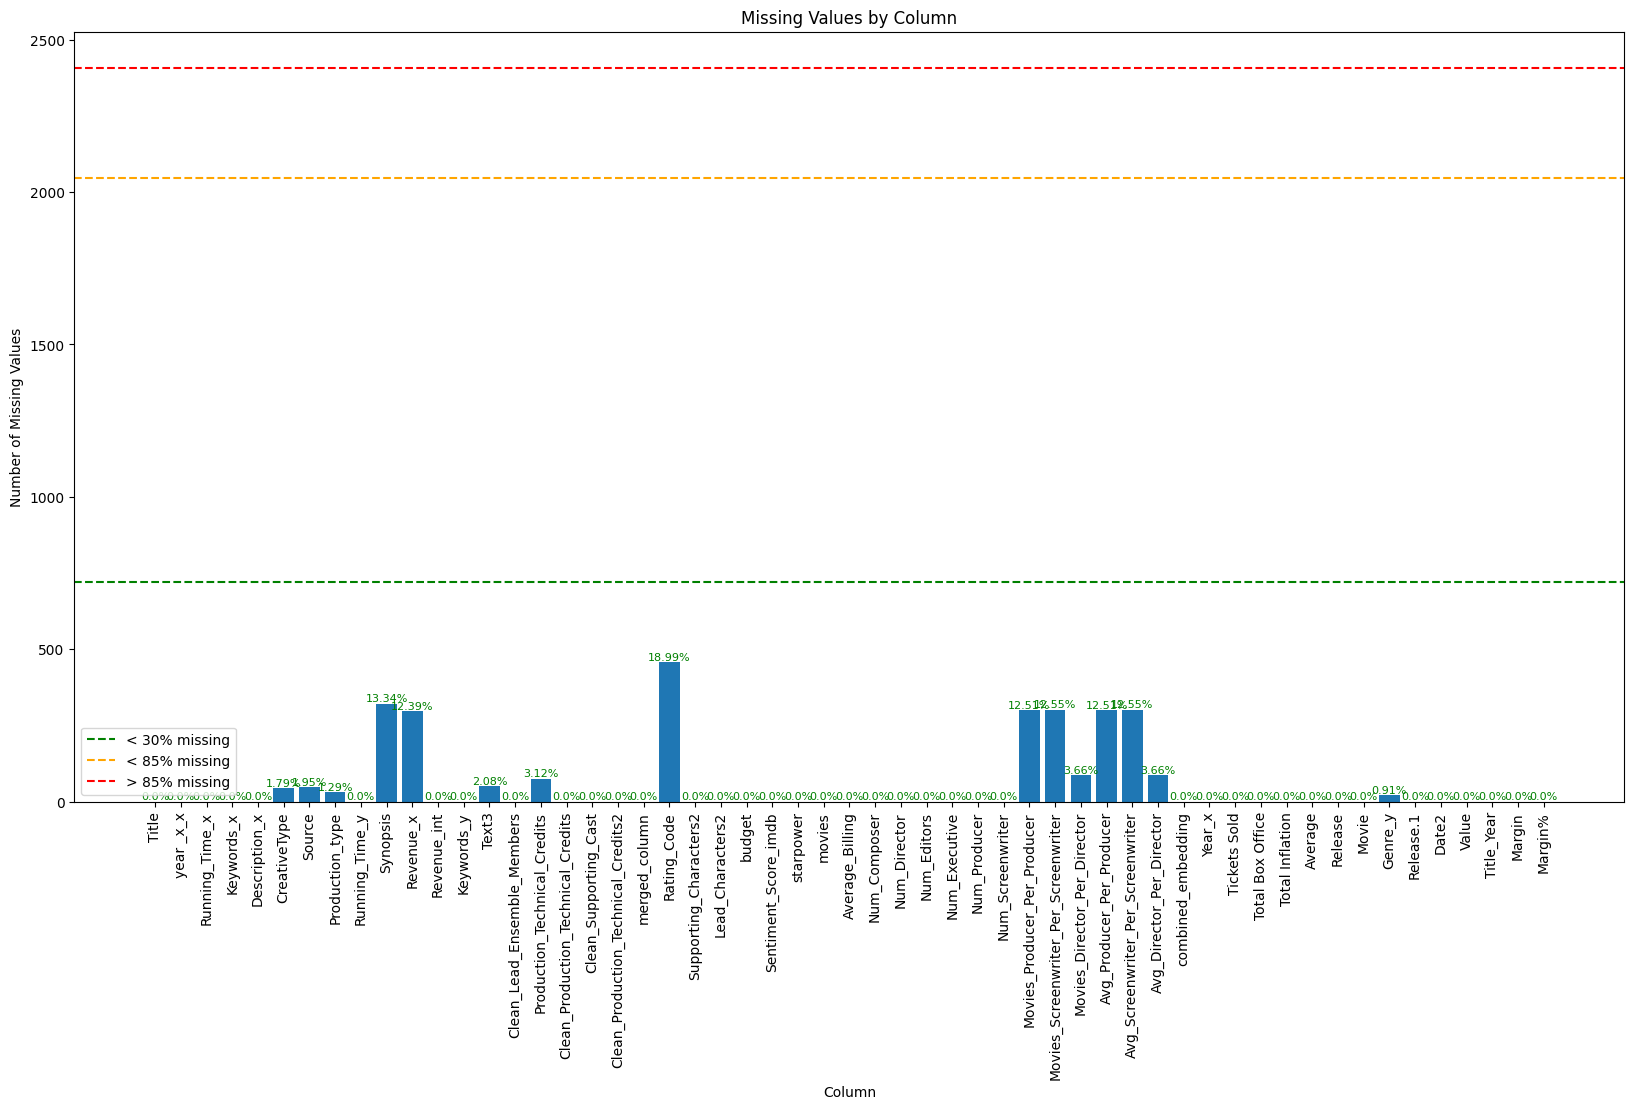

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Count the number of missing values for each column
missing_values = merged_df.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = round((missing_values / len(merged_df)) * 100, 2)

# Set thresholds for differentiating between low, medium, and high missing values
low_threshold = 30
high_threshold = 85

# Create a bar plot to visualize the results
plt.figure(figsize=(20, 10))  # Set the figure size
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')

# Add percentage of missing values as text, and differentiate between low, medium, and high missing values
for i, v in enumerate(percent_missing):
    if v < low_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='green')
    elif v < high_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='orange')
    else:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='red')

# Add horizontal lines to identify the different thresholds
plt.axhline(y=low_threshold*len(merged_df)/100, color='green', linestyle='--', label=f'< {low_threshold}% missing')
plt.axhline(y=high_threshold*len(merged_df)/100, color='orange', linestyle='--', label=f'< {high_threshold}% missing')
plt.axhline(y=len(merged_df), color='red', linestyle='--', label=f'> {high_threshold}% missing')
plt.legend()

plt.show()


In [ ]:
merged_df = merged_df[merged_df["Release.1"]== "Theatrical"]

In [ ]:
merged_df.to_excel("Df_Economical(BUdget).xlsx", index=False)

# **Clustering**

In [ ]:
import pandas as pd
merged_df = pd.read_excel("Df_Economical(BUdget).xlsx")
print(merged_df.head())


                 Title  year _x_x Running_Time_x  \
0              The 355       2022             []   
1               Scream       2022             []   
2  The King’s Daughter       2022             []   
3             Moonfall       2022             []   
4    Death on the Nile       2022             []   

                                          Keywords_x  \
0  ['MI6', 'C.I.A.', 'SecretAgent', 'ActionThrill...   
1  ['SlasherHorror', 'DelayedSequel', 'ThePastCat...   
2  ['Royalty', 'Mermaids', 'DysfunctionalFamily',...   
3    ['ActionThriller', 'EndoftheWorld', 'Disaster']   
4                  ['MurderMystery', 'MysteryDrama']   

                                       Description_x          CreativeType  \
0  SynopsisWhenatop-secretweaponfallsintomercenar...  Contemporary Fiction   
1  SynopsisTwenty-fiveyearsafterastreakofbrutalmu...  Contemporary Fiction   
2  SynopsisKingLouisXIV’squestforimmortalityleads...    Historical Fiction   
3  SynopsisAmysteriousforceknockstheMo

In [ ]:
df = pd.read_excel("Df_Budget.xlsx")
import ast

def string_to_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    else:
        return []

# Apply the function to convert the string column to a list column
df['Keywords_x'] = df['Keywords_x'].apply(string_to_list)
df['Running_Time_x'] = df['Running_Time_x'].apply(string_to_list)
df['Lead_Actors'] = df['Lead_Actors'].apply(string_to_list)
df['Supporting_Actors'] = df['Supporting_Actors'].apply(string_to_list)
df['Supporting_Characters'] = df['Supporting_Characters'].apply(string_to_list)
df['Lead_Characters'] = df['Lead_Characters'].apply(string_to_list)
#Turn Running time into number
def parse_running_time(s):
    if isinstance(s, list) and len(s) > 0:
        running_time_str = s[0]
        if 'minutes' in running_time_str:
            return int(running_time_str.split()[0])
    return None
df['Running_Time_x'] = df['Running_Time_x'].apply(parse_running_time)

import numpy as np
df = df.replace({'budget': 0}, np.nan)

df2 = df[df['budget'].notnull()]

#Fill missing data "Running Time": 
from sklearn.impute import KNNImputer
# create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# impute missing values in the Running_Time_x column
df2[['Running_Time_x']] = imputer.fit_transform(df2[['Running_Time_x']])
df_filtered = df2[["Text", "Running_Time_x"]]

<ipython-input-4-4d03b9ed5910>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Running_Time_x']] = imputer.fit_transform(df2[['Running_Time_x']])


In [ ]:
merged_df = pd.merge(merged_df, df_filtered,left_on='Title_Year', right_on='Text', how="inner")
merged_df = merged_df.drop(columns=["Text", "Running_Time_x_x"])
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title                                 2431 non-null   object 
 1   year _x_x                             2431 non-null   int64  
 2   Keywords_x                            2431 non-null   object 
 3   Description_x                         2431 non-null   object 
 4   CreativeType                          2385 non-null   object 
 5   Source                                2381 non-null   object 
 6   Production_type                       2397 non-null   object 
 7   Running_Time_y                        2431 non-null   object 
 8   Synopsis                              2092 non-null   object 
 9   Revenue_x                             2144 non-null   float64
 10  Revenue_int                           2431 non-null   int64  
 11  Keywords_y       

In [ ]:

merged_df = merged_df.rename(columns={'year _x_x': 'year'})
merged_df = merged_df.rename(columns={'Revenue_int': 'Revenue'})
merged_df = merged_df.rename(columns={'Running_Time_x_y': 'Running_Time'})



0
1
2
3
4
5
6
7
8
9
10
11
12


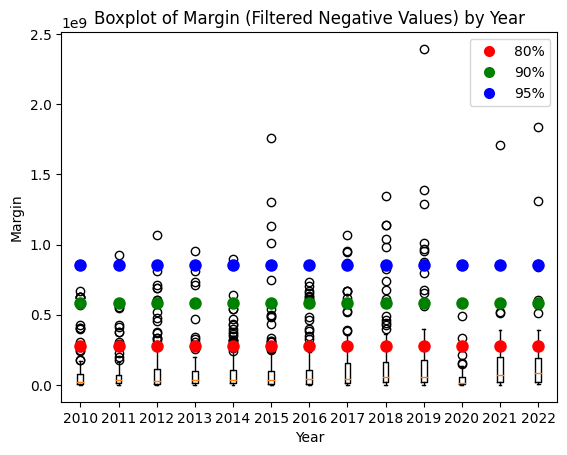

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Filtered data
filtered_data = merged_df[merged_df["Margin"] > 0]

# Create a figure and axes
fig, ax = plt.subplots()

# Group the data by year
grouped_data = filtered_data.groupby("year")

# Add dots for quantile values on top of each boxplot
quantiles = [0.8, 0.9, 0.95]
dot_colors = ['red', 'green', 'blue']  # Different dot colors for each quantile


# Create a boxplot for each year
boxplots = []
for year, data in grouped_data:
    boxplot = ax.boxplot(data["Margin"], positions=[year])
    boxplots.append(boxplot)



for i, boxplot in enumerate(boxplots):
    print(i)
    quantile_values = data["Margin"].quantile(quantiles)
    for q, value, color in zip(quantiles, quantile_values, dot_colors):
      n = 2010
      ax.plot(n + i, value, marker='o', markersize=8, color=color, zorder=10)  # Add dot on top of boxplot

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Margin')
ax.set_title('Boxplot of Margin (Filtered Negative Values) by Year')

# Create custom legend handles
legend_handles = [Line2D([0], [0], marker='o', linestyle='None', markersize=8, markerfacecolor=color, markeredgecolor='none', label=f'{q*100:.0f}%') for q, color in zip(quantiles, dot_colors)]

# Add legend
ax.legend(handles=legend_handles)

# Display the plot
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Group the data by year and compute the 70th and 30th percentile for each year (for positive margins only)
groups = merged_df[merged_df['Margin'] > 0].groupby('year')
pct70 = groups['Margin'].apply(lambda x: np.percentile(x, 75))
pct30 = groups['Margin'].apply(lambda x: np.percentile(x, 25))

# Create a new column in the merged_df frame indicating which cluster each movie belongs to
merged_df['cluster'] = 1  # initialize all to cluster 0
for year, group in groups:
    Margin = group['Margin']
    merged_df.loc[(merged_df['year'] == year) & (merged_df['Margin'] >= pct70[year]), 'cluster'] = 2  # cluster 2 for top 70%
    merged_df.loc[(merged_df['Margin'] <= 0),"cluster"] = 0  # cluster 3 for top 30%

# Print the size of each cluster
print(merged_df['cluster'].value_counts())

# Scale the data and apply KMeans
X = merged_df[['year', 'Margin']].values
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

# Compute the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)



1    1037
0    1022
2     372
Name: cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette score is : 0.5034370208376885


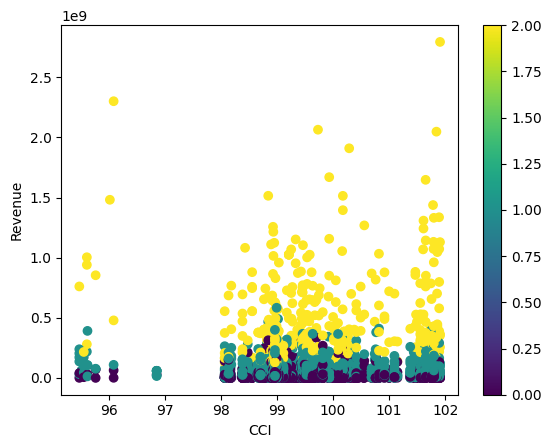

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already clustered your data and stored the labels in a "cluster" column
fig, ax = plt.subplots()
scatter = ax.scatter(merged_df["Value"], merged_df["Revenue"], c=merged_df["cluster"])
ax.set_xlabel("CCI")
ax.set_ylabel("Revenue")
plt.colorbar(scatter)
plt.show()


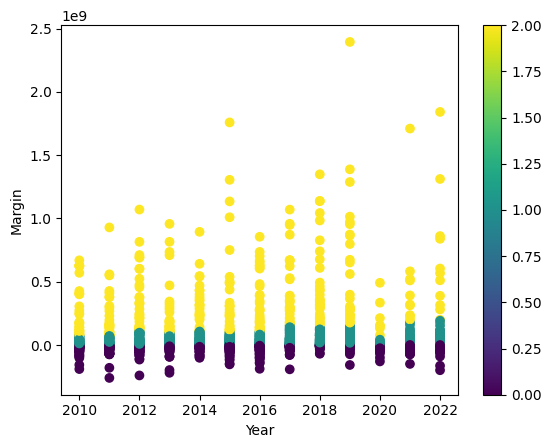

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already clustered your data and stored the labels in a "cluster" column
fig, ax = plt.subplots()
scatter = ax.scatter(merged_df["year"], merged_df["Margin"], c=merged_df["cluster"])
ax.set_xlabel("Year")
ax.set_ylabel("Margin")
plt.colorbar(scatter)
plt.show()


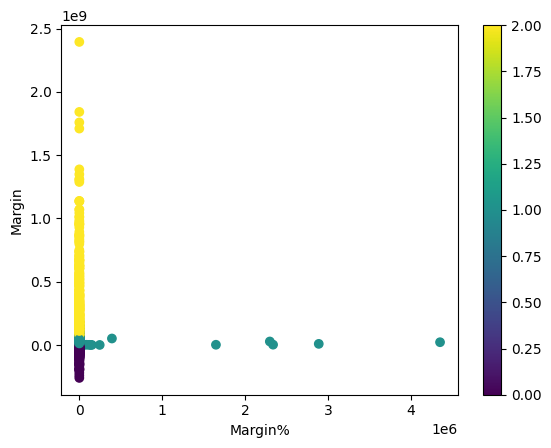

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already clustered your data and stored the labels in a "cluster" column
fig, ax = plt.subplots()
scatter = ax.scatter(merged_df["Margin%"], merged_df["Margin"], c=merged_df["cluster"])
ax.set_xlabel("Margin%")
ax.set_ylabel("Margin")
plt.colorbar(scatter)
plt.show()

In [ ]:
print(merged_df.head())

                 Title  year  \
0              The 355  2022   
1               Scream  2022   
2  The King’s Daughter  2022   
3             Moonfall  2022   
4    Death on the Nile  2022   

                                          Keywords_x  \
0  ['MI6', 'C.I.A.', 'SecretAgent', 'ActionThrill...   
1  ['SlasherHorror', 'DelayedSequel', 'ThePastCat...   
2  ['Royalty', 'Mermaids', 'DysfunctionalFamily',...   
3    ['ActionThriller', 'EndoftheWorld', 'Disaster']   
4                  ['MurderMystery', 'MysteryDrama']   

                                       Description_x          CreativeType  \
0  SynopsisWhenatop-secretweaponfallsintomercenar...  Contemporary Fiction   
1  SynopsisTwenty-fiveyearsafterastreakofbrutalmu...  Contemporary Fiction   
2  SynopsisKingLouisXIV’squestforimmortalityleads...    Historical Fiction   
3  SynopsisAmysteriousforceknockstheMoonfromitsor...       Science Fiction   
4  SynopsisBelgiansleuthHerculePoirot’sEgyptianva...    Historical Fiction   

 

In [ ]:
merged_df['cluster'] = merged_df['cluster'].replace({
    0: 'Loss', 
    1: 'medium to average profit', 
    2: 'Blockbuster'
})

In [ ]:
merged_df.to_csv("DF_Cluster.csv", index=False)

In [ ]:
merged_df.to_excel("DF_CLuster.xlsx", index=False)

# **Cluster 3** *With Revenue*

In [3]:
import pandas as pd
merged_df = pd.read_excel("Df_Economical(BUdget).xlsx")
print(merged_df.head())

                 Title  year _x_x Running_Time_x  \
0              The 355       2022             []   
1               Scream       2022             []   
2  The King’s Daughter       2022             []   
3             Moonfall       2022             []   
4    Death on the Nile       2022             []   

                                          Keywords_x  \
0  ['MI6', 'C.I.A.', 'SecretAgent', 'ActionThrill...   
1  ['SlasherHorror', 'DelayedSequel', 'ThePastCat...   
2  ['Royalty', 'Mermaids', 'DysfunctionalFamily',...   
3    ['ActionThriller', 'EndoftheWorld', 'Disaster']   
4                  ['MurderMystery', 'MysteryDrama']   

                                       Description_x          CreativeType  \
0  SynopsisWhenatop-secretweaponfallsintomercenar...  Contemporary Fiction   
1  SynopsisTwenty-fiveyearsafterastreakofbrutalmu...  Contemporary Fiction   
2  SynopsisKingLouisXIV’squestforimmortalityleads...    Historical Fiction   
3  SynopsisAmysteriousforceknockstheMo

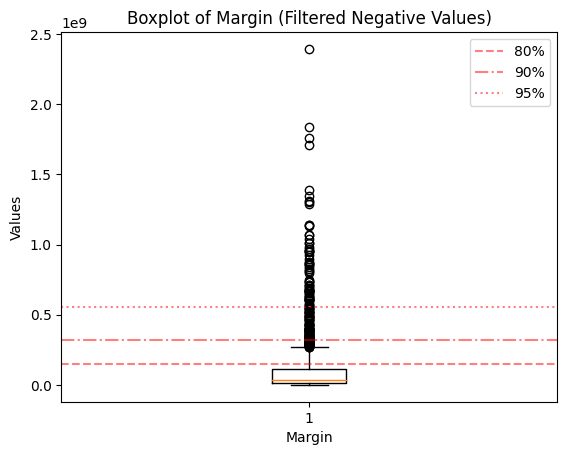

In [4]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Filtered data
filtered_data = merged_df[merged_df["Margin"] > 0]["Margin"]

# Create a figure and axes
fig, ax = plt.subplots()

# Create a boxplot
ax.boxplot(filtered_data)

# Add horizontal lines for quantiles
quantiles = [0.8, 0.9, 0.95]
quantile_values = filtered_data.quantile(quantiles)
quantile_labels = [f'{q*100:.0f}%' for q in quantiles]  # Format quantile labels

lines = []  # Store lines for legend
line_styles = ['--', '-.', ':']  # Different line styles for each quantile
for value, label, linestyle in zip(quantile_values, quantile_labels, line_styles):
    line = ax.axhline(value, linestyle=linestyle, color='r', alpha=0.5)
    lines.append(line)

# Set labels and title
ax.set_xlabel('Margin')
ax.set_ylabel('Values')
ax.set_title('Boxplot of Margin (Filtered Negative Values)')

# Create custom legend handles
legend_handles = [Line2D([0], [0], linestyle=line_styles[i], color='r', alpha=0.5, label=quantile_labels[i]) for i in range(len(quantile_labels))]

# Add legend
ax.legend(handles=legend_handles)

# Display the plot
plt.show()



In [5]:
import pandas as pd

merged_df = pd.read_excel("Df_Economical(BUdget).xlsx")
df = pd.read_excel("Df_Budget.xlsx")
import ast

def string_to_list(s):
    if isinstance(s, str):
        return ast.literal_eval(s)
    else:
        return []

# Apply the function to convert the string column to a list column
df['Keywords_x'] = df['Keywords_x'].apply(string_to_list)
df['Running_Time_x'] = df['Running_Time_x'].apply(string_to_list)
df['Lead_Actors'] = df['Lead_Actors'].apply(string_to_list)
df['Supporting_Actors'] = df['Supporting_Actors'].apply(string_to_list)
df['Supporting_Characters'] = df['Supporting_Characters'].apply(string_to_list)
df['Lead_Characters'] = df['Lead_Characters'].apply(string_to_list)
#Turn Running time into number
def parse_running_time(s):
    if isinstance(s, list) and len(s) > 0:
        running_time_str = s[0]
        if 'minutes' in running_time_str:
            return int(running_time_str.split()[0])
    return None
df['Running_Time_x'] = df['Running_Time_x'].apply(parse_running_time)

import numpy as np
df = df.replace({'budget': 0}, np.nan)

df2 = df[df['budget'].notnull()]

#Fill missing data "Running Time": 
from sklearn.impute import KNNImputer
# create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# impute missing values in the Running_Time_x column
df2[['Running_Time_x']] = imputer.fit_transform(df2[['Running_Time_x']])
df_filtered = df2[["Text", "Running_Time_x"]]
merged_df = pd.merge(merged_df, df_filtered,left_on='Title_Year', right_on='Text', how="inner")
merged_df = merged_df.drop(columns=["Text", "Running_Time_x_x", "Title_Year"])
merged_df = merged_df.rename(columns={'year _x_x': 'year'})
merged_df = merged_df.rename(columns={'Revenue_int': 'Revenue'})
merged_df = merged_df.rename(columns={'Running_Time_x_y': 'Running_Time'})


<ipython-input-5-ea0b45656178>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Running_Time_x']] = imputer.fit_transform(df2[['Running_Time_x']])


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Group the data by year and compute the quartiles for each year (for positive margins only)
groups = merged_df[merged_df['Revenue'] > 0].groupby('year')
q25 = groups['Revenue'].apply(lambda x: np.percentile(x, 60))
q50 = groups['Revenue'].apply(lambda x: np.percentile(x, 75))
q75 = groups['Revenue'].apply(lambda x: np.percentile(x, 90))
max_rev = groups['Revenue'].max()

# Create a new column in the merged_df frame indicating which cluster each movie belongs to
merged_df['cluster'] = 0  # initialize all to cluster 0
for year, group in groups:
    Revenue = group['Revenue']
    merged_df.loc[(merged_df['year'] == year) & (Revenue >= q25[year]) & (Revenue < q75[year]), 'cluster'] = 1  
    merged_df.loc[(merged_df['year'] == year) & (Revenue >= q75[year]) & (Revenue <= max_rev[year]), 'cluster'] = 2  


# Print the size of each cluster
print(merged_df['cluster'].value_counts())

# Scale the data and apply KMeans
X = merged_df[['year', 'Revenue']].values
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

# Compute the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)

0    1456
1     714
2     261
Name: cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette score is : 0.49904651034118913


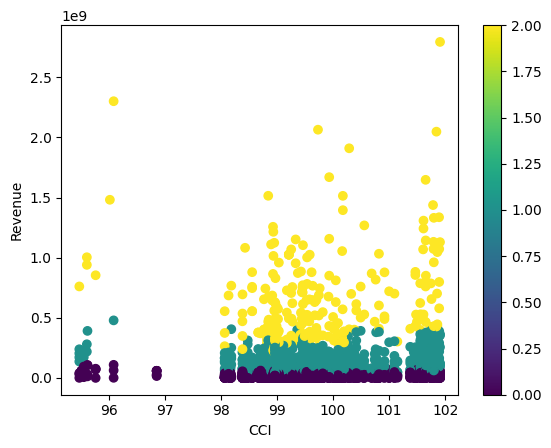

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
scatter = ax.scatter(merged_df["Value"], merged_df["Revenue"], c=merged_df["cluster"])
ax.set_xlabel("CCI")
ax.set_ylabel("Revenue")
plt.colorbar(scatter)
plt.show()

In [9]:
merged_df.to_csv("DF_Cluster3.csv", index=False)
merged_df.to_excel("DF_CLuster3.xlsx", index=False)

# ***Feature Selection: ***

In [10]:
df = pd.read_csv("DF_Cluster3.csv")
df['cluster'] = df['cluster'].replace({
     'Loss': 0, 
    'medium to average profit' : 1, 
    'Blockbuster' : 2
})

# Define the frequency threshold for grouping
freq_threshold = 100  # You can adjust this value based on the frequency distribution of your data
# Group low input columns
columns_to_group = ["Rating_Code", "CreativeType", "Source", "Production_type","Genre_y"]
# Group the low frequency values into a category called "Other"
for col in columns_to_group:
    value_counts = df[col].value_counts()
    low_freq_values = value_counts[value_counts < freq_threshold].index
    df[col] = df[col].apply(lambda x: "Other" if x in low_freq_values else x)

cols = ["Genre_y", "Rating_Code", "CreativeType", "Source", "Production_type"]
df[cols] = df[cols].fillna("Other")
df['Rating_Code'] = df['Rating_Code'].astype('category')
df['CreativeType'] = df['CreativeType'].astype('category')
df['Source'] = df['Source'].astype('category')
df['Production_type'] = df['Production_type'].astype('category')
df['Genre_y'] = df['Genre_y'].astype('category')
# Expand the list of embeddings into separate columns
embeddings_df = pd.DataFrame(df["combined_embedding"].tolist())

# Concatenate the embeddings dataframe with the original dataframe
df = pd.concat([df, embeddings_df], axis=1)

# Drop the original "combined_embedding" column
df = df.drop("combined_embedding", axis=1)

df['Movies_Director_Per_Director'].fillna(0, inplace=True)
# fill null values in column 'Avg_Director_Per_Director' with 0
df['Avg_Director_Per_Director'].fillna(0, inplace=True)
# fill null values in column 'Movies_Director_Per_Director' with 0
df['Avg_Producer_Per_Producer'].fillna(0, inplace=True)
# fill null values in column 'Avg_Director_Per_Director' with 0
df['Avg_Screenwriter_Per_Screenwriter'].fillna(0, inplace=True)
# fill null values in column 'Avg_Director_Per_Director' with 0
df['Avg_Director_Per_Director'].fillna(0, inplace=True)
# fill null values in column 'Avg_Director_Per_Director' with 0
df['Movies_Producer_Per_Producer'].fillna(0, inplace=True)
 # fill null values in column 'Avg_Director_Per_Director' with 0
df['Movies_Screenwriter_Per_Screenwriter'].fillna(0, inplace=True)

df= df.drop(columns=['Revenue_x','Description_x', 'Keywords_y', 'Text3',"Running_Time_y",
       'Clean_Lead_Ensemble_Members', 'Production_Technical_Credits',
       'Clean_Production_Technical_Credits', 'Clean_Supporting_Cast',
       'Clean_Production_Technical_Credits2', 'merged_column',
       'Supporting_Characters2', 'Lead_Characters2',"Keywords_x", 'Synopsis','Title',"Release","Movie",'Release.1', 'Date2','Margin', 'Margin%',0,'Revenue'])

In [11]:
import pandas as pd

def dataframe_to_latex(df, output_file):
    # Create a list to store the rows of information
    rows = []
    
    # Iterate over the columns of the DataFrame
    for column in df.columns:
        # Get the column name and data type
        column_name = column
        data_type = str(df[column].dtype)
        
        # Get the count of non-null values and the number of unique values
        non_null_count = df[column].count()
        unique_count = df[column].nunique()
        
        # Create a row string with the information
        row = f"{column_name} & {data_type} & {non_null_count} & {unique_count} \\\\"
        rows.append(row)
    
    # Create the final LaTeX table
    latex_table = "\\begin{tabular}{|l|l|r|r|}\n"
    latex_table += "\\hline\n"
    latex_table += "Column & Data Type & Non-null Count & Unique Count \\\\\n"
    latex_table += "\\hline\n"
    latex_table += "\n".join(rows)
    latex_table += "\n\\hline\n"
    latex_table += "\\end{tabular}"
    
    # Save the LaTeX output to a file
    with open(output_file, 'w') as file:
        file.write(latex_table)
    
    print(f"LaTeX output saved to {output_file}")
    print(latex_table)
output_file = 'Info_Final_df.tex'
dataframe_to_latex(df, output_file)

LaTeX output saved to Info_Final_df.tex
\begin{tabular}{|l|l|r|r|}
\hline
Column & Data Type & Non-null Count & Unique Count \\
\hline
year & int64 & 2431 & 13 \\
CreativeType & category & 2431 & 7 \\
Source & category & 2431 & 5 \\
Production_type & category & 2431 & 4 \\
Rating_Code & category & 2431 & 3 \\
budget & int64 & 2431 & 503 \\
Sentiment_Score_imdb & float64 & 2431 & 2039 \\
starpower & int64 & 2431 & 670 \\
movies & int64 & 2431 & 34 \\
Average_Billing & float64 & 2431 & 941 \\
Num_Composer & int64 & 2431 & 5 \\
Num_Director & int64 & 2431 & 4 \\
Num_Editors & int64 & 2431 & 6 \\
Num_Executive & int64 & 2431 & 24 \\
Num_Producer & int64 & 2431 & 13 \\
Num_Screenwriter & int64 & 2431 & 9 \\
Movies_Producer_Per_Producer & float64 & 2431 & 347 \\
Movies_Screenwriter_Per_Screenwriter & float64 & 2431 & 97 \\
Movies_Director_Per_Director & float64 & 2431 & 50 \\
Avg_Producer_Per_Producer & float64 & 2431 & 1893 \\
Avg_Screenwriter_Per_Screenwriter & float64 & 2431 & 1733 \\
Avg

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

X = pd.get_dummies(df, columns=["Rating_Code", "CreativeType", "Source", "Production_type","Genre_y"])
X = X.drop(columns = ["cluster"])
y = df['cluster']


# Create decision tree classifier object
clf = DecisionTreeClassifier()

# Perform recursive feature elimination
rfe = RFE(estimator=clf, n_features_to_select=5, step=1)
rfe.fit(X, y)

# Print selected features
print(X.columns[rfe.support_])
print(X.columns)



Index(['budget', 'Avg_Producer_Per_Producer',
       'Avg_Screenwriter_Per_Screenwriter', 'Avg_Director_Per_Director',
       'Running_Time'],
      dtype='object')
Index(['year', 'budget', 'Sentiment_Score_imdb', 'starpower', 'movies',
       'Average_Billing', 'Num_Composer', 'Num_Director', 'Num_Editors',
       'Num_Executive', 'Num_Producer', 'Num_Screenwriter',
       'Movies_Producer_Per_Producer', 'Movies_Screenwriter_Per_Screenwriter',
       'Movies_Director_Per_Director', 'Avg_Producer_Per_Producer',
       'Avg_Screenwriter_Per_Screenwriter', 'Avg_Director_Per_Director',
       'Year_x', 'Tickets Sold', 'Total Box Office', 'Total Inflation',
       'Average', 'Value', 'Running_Time', 'Rating_Code_Other',
       'Rating_Code_PG', 'Rating_Code_R', 'CreativeType_Contemporary Fiction',
       'CreativeType_Dramatization', 'CreativeType_Fantasy',
       'CreativeType_Historical Fiction', 'CreativeType_Kids Fiction',
       'CreativeType_Other', 'CreativeType_Science Fiction',
  

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your data stored in X and y_train

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=108)

# Fit the classifier to your training data
rf.fit(X, y)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features based on importance (descending order)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

# Set a threshold for selecting features
threshold = 0.034  # Adjust this value as needed

# Select the features above the threshold
selected_features = feature_importances.loc[feature_importances['Importance'] > threshold, 'Feature'].tolist()

# Print the selected features
print("Selected Features:")
print(selected_features)

                                     Feature  Importance
16         Avg_Screenwriter_Per_Screenwriter    0.161970
15                 Avg_Producer_Per_Producer    0.144600
17                 Avg_Director_Per_Director    0.114855
1                                     budget    0.090287
4                                     movies    0.052304
3                                  starpower    0.043231
5                            Average_Billing    0.037142
12              Movies_Producer_Per_Producer    0.033829
24                              Running_Time    0.025656
2                       Sentiment_Score_imdb    0.024105
13      Movies_Screenwriter_Per_Screenwriter    0.021262
9                              Num_Executive    0.020180
14              Movies_Director_Per_Director    0.020165
23                                     Value    0.019478
10                              Num_Producer    0.013819
21                           Total Inflation    0.012818
19                             

In [14]:
output_file = 'feature_importance.tex'
feature_importances[:10].to_latex(output_file, index=False, caption='Feature Importance', label='tab:feature-importance', column_format='|l|r|')

print(f"Table exported to {output_file}.")

<ipython-input-14-6efd9cdfe6fc>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  feature_importances[:10].to_latex(output_file, index=False, caption='Feature Importance', label='tab:feature-importance', column_format='|l|r|')


Table exported to feature_importance.tex.


In [15]:
# Print the feature importances
print(feature_importances)

# Set a threshold for selecting features
threshold = 0.034  # Adjust this value as needed

# Select the features above the threshold
selected_features = feature_importances.loc[feature_importances['Importance'] > threshold, 'Feature'].tolist()

# Print the selected features
print("Selected Features:")
print(selected_features)

# Get the list of one-hot encoded categorical columns
categorical_columns = ["Rating_Code", "CreativeType", "Source", "Production_type", "Genre_y"]

# Create a dictionary to store the sum of feature importances for each category
category_importance_sum = {}

# Initialize the sum for each category to 0
for column in categorical_columns:
    category_importance_sum[column] = 0

# Loop through the feature importances DataFrame
for index, row in feature_importances.iterrows():
    feature_name = row['Feature']
    importance = row['Importance']

    # Check if the feature belongs to a categorical column
    for column in categorical_columns:
        if feature_name.startswith(column):
            # Add the importance to the sum of the corresponding category
            category_importance_sum[column] += importance

# Print the sum of feature importances for each category
print("Sum of Feature Importances for Categorical Variables:")
for column, importance_sum in category_importance_sum.items():
    print(f"{column}: {importance_sum}")


                                     Feature  Importance
16         Avg_Screenwriter_Per_Screenwriter    0.161970
15                 Avg_Producer_Per_Producer    0.144600
17                 Avg_Director_Per_Director    0.114855
1                                     budget    0.090287
4                                     movies    0.052304
3                                  starpower    0.043231
5                            Average_Billing    0.037142
12              Movies_Producer_Per_Producer    0.033829
24                              Running_Time    0.025656
2                       Sentiment_Score_imdb    0.024105
13      Movies_Screenwriter_Per_Screenwriter    0.021262
9                              Num_Executive    0.020180
14              Movies_Director_Per_Director    0.020165
23                                     Value    0.019478
10                              Num_Producer    0.013819
21                           Total Inflation    0.012818
19                             

In [19]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
np.random.seed(108)
# Assuming you have your data stored in X and y_train
X = pd.get_dummies(df, columns=["Rating_Code", "CreativeType", "Source", "Production_type","Genre_y"])
X = X.drop(columns=["cluster"])
y = df['cluster']

# Handle missing values if any
X = X.dropna()
y = y.dropna()

# Convert data types to float
X = X.astype(float)
y = y.astype(float)

# Add a constant column to X
X = sm.add_constant(X)

# Fit the model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Perform variable selection
selected_features = X.columns[results.pvalues < 0.01].tolist()

# Print the selected features
print("Selected Features (Bayesian Variable Selection):")
print(selected_features)


Selected Features (Bayesian Variable Selection):
['budget', 'starpower', 'movies', 'Num_Screenwriter', 'Movies_Producer_Per_Producer', 'Movies_Director_Per_Director', 'Avg_Screenwriter_Per_Screenwriter']


In [21]:
df["Genre_y2"] = df["Genre_y"]
df = pd.get_dummies(df, columns=["Rating_Code", "CreativeType", "Source", "Production_type","Genre_y"])
# Split the data into training and test sets based on year

In [25]:
#Creating Final Data Set: 

final_df=df[["Avg_Screenwriter_Per_Screenwriter","Avg_Producer_Per_Producer","Avg_Director_Per_Director","budget","movies","starpower","Average_Billing",'Movies_Producer_Per_Producer','Running_Time',
'Movies_Screenwriter_Per_Screenwriter','Sentiment_Score_imdb','Num_Executive','Movies_Director_Per_Director' ,"Value",
'Genre_y_Action', 'Genre_y_Adventure','Genre_y_Comedy', 'Genre_y_Drama', 'Genre_y_Horror', 'Genre_y_Other',"starpower", 'Genre_y_Thriller/Suspense','Num_Screenwriter',"cluster","Year_x"]]

In [27]:
final_df.to_csv("Final_Filtered.csv", index=False)
final_df.to_excel("Final_Filterd.xlsx", index=False)